In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
tweet = pd.read_csv('russian_tweets.csv')
tweet


,Unnamed: 0,content
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,226970,.@vfpatlas well that's a swella word there (di...
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,161610,Жители обстреливаемых районов Донецка проводят...
...,...,...
995,24329,How To Inspire People With Your Music! https:/...
996,315060,... https://t.co/AfWdTkKQlm
997,361901,Trevor Noah: Until we start treating racism li...
998,119948,SenSanders: RT SenJeffMerkley: We must act bol...


In [7]:
tweets = tweet.drop('Unnamed: 0', axis=1)
tweets

,content
0,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,.@vfpatlas well that's a swella word there (di...
3,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,Жители обстреливаемых районов Донецка проводят...
...,...
995,How To Inspire People With Your Music! https:/...
996,... https://t.co/AfWdTkKQlm
997,Trevor Noah: Until we start treating racism li...
998,SenSanders: RT SenJeffMerkley: We must act bol...


In [8]:
tweets['char_count'] = tweets['content'].apply(len)

In [9]:
print(tweets['char_count'].mean())

103.462


In [10]:
def count_mentions(string):
    words = string.split()
    mentions = [word for word in words if word.startswith('@')]
    return len(mentions)


In [12]:
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets

,content,char_count,mention_count
0,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130,0
1,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138,0
2,.@vfpatlas well that's a swella word there (di...,65,0
3,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139,0
4,Жители обстреливаемых районов Донецка проводят...,131,0
...,...,...,...
995,How To Inspire People With Your Music! https:/...,86,0
996,... https://t.co/AfWdTkKQlm,27,0
997,Trevor Noah: Until we start treating racism li...,103,0
998,SenSanders: RT SenJeffMerkley: We must act bol...,140,0


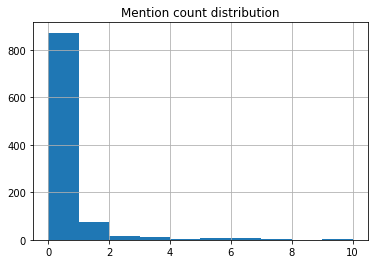

In [15]:
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

In [47]:
f = open("response.txt", 'rU')
speech = f.read()
print(speech)

Unknown Speaker  0:00  
Good evening, my fellow Americans, and Happy Lunar New Year. I'm Stacey Abrams, and I'm honored to join the conversation about the state of our union. Growing up, my family went back and forth between lower middle class and working class. Yet even when they came home weary and boom, tired, my parents found a way to show us all who we could be. My librarian mother taught us to love learning. My father shipyard worker, put in overtime and extra shifts, and they made sure we volunteered to help others. Later, they both became United Methodist ministers, an expression of the faith that guides us. These were our family values, faith, service, education, and responsibility. Now, we only had one car, so sometimes my dad had to hitchhike and walk long stretches during the 30 mile trip home from the shipyards. One rainy night my mom got worried, we pile up In the car and went out looking for him, and we eventually found my dad making his way along the road, soaked and sh

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [19]:
nlp = spacy.load('en_core_web_sm')

In [48]:
doc = nlp(speech)

In [49]:
tokens = [token.text for token in doc]
print(tokens)

['Unknown', 'Speaker', ' ', '0:00', ' \n', 'Good', 'evening', ',', 'my', 'fellow', 'Americans', ',', 'and', 'Happy', 'Lunar', 'New', 'Year', '.', 'I', "'m", 'Stacey', 'Abrams', ',', 'and', 'I', "'m", 'honored', 'to', 'join', 'the', 'conversation', 'about', 'the', 'state', 'of', 'our', 'union', '.', 'Growing', 'up', ',', 'my', 'family', 'went', 'back', 'and', 'forth', 'between', 'lower', 'middle', 'class', 'and', 'working', 'class', '.', 'Yet', 'even', 'when', 'they', 'came', 'home', 'weary', 'and', 'boom', ',', 'tired', ',', 'my', 'parents', 'found', 'a', 'way', 'to', 'show', 'us', 'all', 'who', 'we', 'could', 'be', '.', 'My', 'librarian', 'mother', 'taught', 'us', 'to', 'love', 'learning', '.', 'My', 'father', 'shipyard', 'worker', ',', 'put', 'in', 'overtime', 'and', 'extra', 'shifts', ',', 'and', 'they', 'made', 'sure', 'we', 'volunteered', 'to', 'help', 'others', '.', 'Later', ',', 'they', 'both', 'became', 'United', 'Methodist', 'ministers', ',', 'an', 'expression', 'of', 'the', '

In [50]:
lemmas = [token.lemma_ for token in doc]
lemmas

['unknown',
 'Speaker',
 ' ',
 '0:00',
 ' \n',
 'good',
 'evening',
 ',',
 '-PRON-',
 'fellow',
 'Americans',
 ',',
 'and',
 'Happy',
 'Lunar',
 'New',
 'Year',
 '.',
 '-PRON-',
 'be',
 'Stacey',
 'Abrams',
 ',',
 'and',
 '-PRON-',
 'be',
 'honor',
 'to',
 'join',
 'the',
 'conversation',
 'about',
 'the',
 'state',
 'of',
 '-PRON-',
 'union',
 '.',
 'grow',
 'up',
 ',',
 '-PRON-',
 'family',
 'go',
 'back',
 'and',
 'forth',
 'between',
 'low',
 'middle',
 'class',
 'and',
 'working',
 'class',
 '.',
 'yet',
 'even',
 'when',
 '-PRON-',
 'come',
 'home',
 'weary',
 'and',
 'boom',
 ',',
 'tired',
 ',',
 '-PRON-',
 'parent',
 'find',
 'a',
 'way',
 'to',
 'show',
 '-PRON-',
 'all',
 'who',
 '-PRON-',
 'could',
 'be',
 '.',
 '-PRON-',
 'librarian',
 'mother',
 'teach',
 '-PRON-',
 'to',
 'love',
 'learning',
 '.',
 '-PRON-',
 'father',
 'shipyard',
 'worker',
 ',',
 'put',
 'in',
 'overtime',
 'and',
 'extra',
 'shift',
 ',',
 'and',
 '-PRON-',
 'make',
 'sure',
 '-PRON-',
 'volunteer',

In [28]:
print(' '.join(lemmas))

unknown Speaker   0:00  
 good evening , -PRON- fellow Americans , and Happy Lunar New Year . -PRON- be Stacey Abrams , and -PRON- be honor to join the conversation about the state of -PRON- union . grow up , -PRON- family go back and forth between low middle class and working class . yet even when -PRON- come home weary and boom , tired , -PRON- parent find a way to show -PRON- all who -PRON- could be . -PRON- librarian mother teach -PRON- to love learning . -PRON- father shipyard worker , put in overtime and extra shift , and -PRON- make sure -PRON- volunteer to help other . later , -PRON- both become United Methodist minister , an expression of the faith that guide -PRON- . these be -PRON- family value , faith , service , education , and responsibility . now , -PRON- only have one car , so sometimes -PRON- dad have to hitchhike and walk long stretch during the 30 mile trip home from the shipyard . one rainy night -PRON- mom get worried , -PRON- pile up in the car and go out look for

In [30]:
pos = [[token.text, token.pos_]for token in doc]
print(pos)

[['Unknown', 'ADJ'], ['Speaker', 'PROPN'], [' ', 'SPACE'], ['0:00', 'NUM'], [' \n', 'SPACE'], ['Good', 'ADJ'], ['evening', 'NOUN'], [',', 'PUNCT'], ['my', 'DET'], ['fellow', 'ADJ'], ['Americans', 'PROPN'], [',', 'PUNCT'], ['and', 'CCONJ'], ['Happy', 'PROPN'], ['Lunar', 'PROPN'], ['New', 'PROPN'], ['Year', 'PROPN'], ['.', 'PUNCT'], ['I', 'PRON'], ["'m", 'AUX'], ['Stacey', 'PROPN'], ['Abrams', 'PROPN'], [',', 'PUNCT'], ['and', 'CCONJ'], ['I', 'PRON'], ["'m", 'AUX'], ['honored', 'VERB'], ['to', 'PART'], ['join', 'VERB'], ['the', 'DET'], ['conversation', 'NOUN'], ['about', 'ADP'], ['the', 'DET'], ['state', 'NOUN'], ['of', 'ADP'], ['our', 'DET'], ['union', 'NOUN'], ['.', 'PUNCT'], ['Growing', 'VERB'], ['up', 'ADP'], [',', 'PUNCT'], ['my', 'DET'], ['family', 'NOUN'], ['went', 'VERB'], ['back', 'ADV'], ['and', 'CCONJ'], ['forth', 'ADV'], ['between', 'ADP'], ['lower', 'ADJ'], ['middle', 'ADJ'], ['class', 'NOUN'], ['and', 'CCONJ'], ['working', 'NOUN'], ['class', 'NOUN'], ['.', 'PUNCT'], ['Yet',

In [31]:
def proper_nouns(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

In [32]:
print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


In [33]:
def nouns(text, model=nlp):
    doc = nlp(text)
    pos = [token.pos_ for token in doc]
    return pos.count('NOUN')

In [34]:
print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

2


In [37]:
headlines = pd.read_csv('fakenews.csv').drop('Unnamed: 0', axis=1)
headlines

,title,label
0,You Can Smell Hillary’s Fear,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matters,REAL
...,...,...
95,The Mandela Effect was made by one overlooked ...,FAKE
96,CNN: One voter can make a difference by voting...,FAKE
97,Give Social Security recipients a CEO-style raise,REAL
98,"Fireworks erupt between Trump and Bush, Rubio ...",REAL


In [38]:
headlines['num_propn'] = headlines['title'].apply(proper_nouns)
headlines['num_noun'] = headlines['title'].apply(nouns)

In [39]:
headlines

,title,label,num_propn,num_noun
0,You Can Smell Hillary’s Fear,FAKE,1,1
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,8,1
2,Kerry to go to Paris in gesture of sympathy,REAL,2,2
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,2,3
4,The Battle of New York: Why This Primary Matters,REAL,4,0
...,...,...,...,...
95,The Mandela Effect was made by one overlooked ...,FAKE,2,5
96,CNN: One voter can make a difference by voting...,FAKE,1,2
97,Give Social Security recipients a CEO-style raise,REAL,2,3
98,"Fireworks erupt between Trump and Bush, Rubio ...",REAL,5,2


In [43]:
# Compute the mean of the proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()
print(f'Real Propn: {real_propn}')
print(f'Fake Propn: {fake_propn}')

Real Propn: 2.3684210526315788
Fake Propn: 4.348837209302325


In [44]:
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()
print(f'Real Noun: {real_noun}')
print(f'Fake Noun: {fake_noun}')

Real Noun: 2.3157894736842106
Fake Noun: 1.8372093023255813


In [51]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Americans NORP
Happy Lunar PERSON
Stacey Abrams PERSON
United Methodist PERSON
one CARDINAL
the 30 mile QUANTITY
One CARDINAL
Americans NORP
these United States GPE
first ORDINAL
Democratic NORP
Georgia GPE
tonight TIME
America GPE
America GPE
Just a few weeks ago DATE
weeks DATE
the United States GPE
seven years DATE
the Democratic Party ORG
the Georgia House of Representatives FAC
republican NORP
Americans NORP
today DATE
tomorrow DATE
White House ORG
first ORDINAL
America GPE
Georgia GPE
Republican NORP
Americans NORP
Republican NORP
millions CARDINAL
the 21st century DATE
Reagan PERSON
Obama PERSON
Americans NORP
democrats NORP
America GPE
6:19 CARDINAL
republican NORP
years DATE
Americans NORP
14 CARDINAL
Medicaid ORG
2018 DATE
Georgia GPE
Americans NORP
America GPE
Jim Crow PERSON
the Civil Rights Act LAW
the Voting Rights Act LAW
America GPE
Roe v. Wade LAW
LGBTQ ORG
America GPE
American NORP
10:10 CARDINAL
10:13 CARDINAL
America GPE
America GPE
God PERSON
the United States of A

In [57]:
def find_persons(text):
    doc = nlp(text)
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    return persons

In [58]:
print(find_persons(speech))

['Happy Lunar', 'Stacey Abrams', 'United Methodist', 'Reagan', 'Obama', 'Jim Crow', 'God', 'Transcribed']
